# <center> <span style="font-size:35px;"> Heart Attack </span> </center>
Heart Attack (myocardial infarction) happens when one or more areas of the heart muscle don't get enough oxygen. This happens when blood flow to the heart muscle is blocked.

## Symptoms of Heart Attack:

* Severe pressure, fullness, squeezing, pain, or discomfort in the center of the chest that lasts for more than a few minutes
* Pain or discomfort that spreads to the shoulders, neck, arms, or jaw
* Chest pain that gets worse
* Chest pain that doesn't get better with rest
* Chest pain that happens along with any of these symptoms:
    1. Sweating, cool, clammy skin, or paleness
    2.Shortness of breath
    3.Nausea or vomiting
    4.Dizziness or fainting
    5.Unexplained weakness or fatigue
    6.Rapid or irregular pulse
    

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#f8f0e3;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
Cardiovascular diseases (CVDs) are the leading cause of death globally. An estimated 17.9 million people died from CVDs in 2019, 
representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.<br>
Well it is important to identify risk of heart attack in patients, and treat them with proper medicine to prolong their life.
</p>
</div>

We will use the heart attack dataset containing following parameters, to predict the chances of heart attack in patients:

* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

In [180]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
#import the dataset
df = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [182]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [183]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [185]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# EDA

<AxesSubplot:xlabel='output', ylabel='count'>

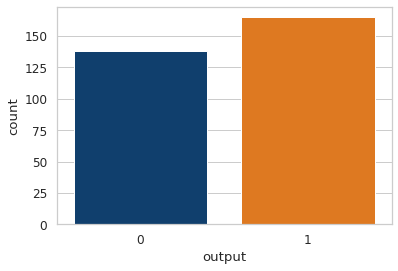

In [186]:
sns.set(style = 'whitegrid' ,font = 'Rubik', font_scale = 1.1)
sns.countplot(x='output', data=df, palette=["#003F7D", "#FD7702"])


In [187]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

As we can see the target variable is not unevenly distributed, so we can use accuracy as the metric for model performance.

In [188]:
#Converting sex column into string representation of male-female to help in visualizations
#Splitting the age column into ranges for neat and clean visualizations
df['range'] = pd.cut(df.age, [0, 10, 20, 30, 40, 50, 60 ,70, 80])
df['M/F'] = df['sex'].apply(lambda x : 'male' if x == 1 else 'female')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,range,M/F
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 70]",male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(30, 40]",male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 50]",female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(50, 60]",male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(50, 60]",female


<AxesSubplot:xlabel='M/F', ylabel='count'>

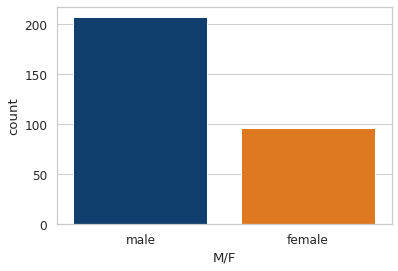

In [189]:
sns.set(style = 'whitegrid' ,font = 'Rubik', font_scale = 1.1)
sns.countplot(x='M/F', data=df, palette=["#003F7D", "#FD7702"])

In [190]:
df['M/F'].value_counts()

male      207
female     96
Name: M/F, dtype: int64

The dataset is unevenly distributed in terms of male-female ratio.

<AxesSubplot:xlabel='range', ylabel='count'>

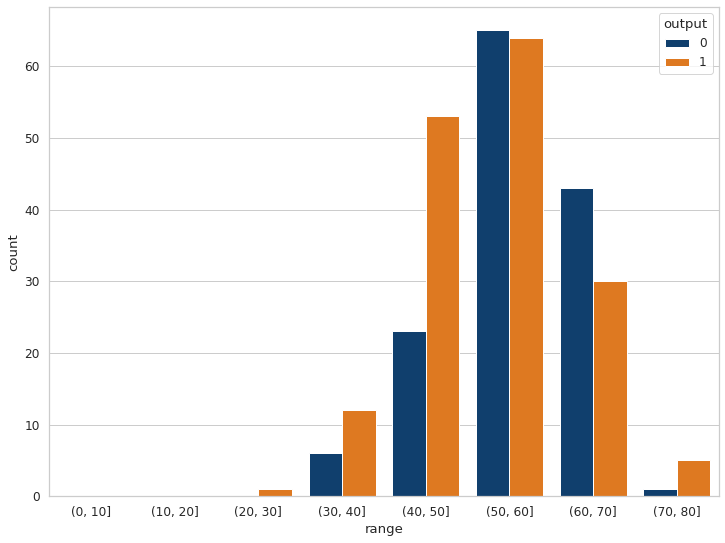

In [191]:
#Age vs output

plt.figure(figsize=(12, 9))
sns.countplot(x='range', data = df, hue='output', palette=["#003F7D", "#FD7702"])

People in the age range of 50-60 have higher chances of heart attack.

<AxesSubplot:xlabel='M/F', ylabel='count'>

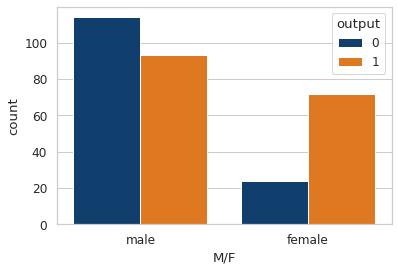

In [192]:
#Sex vs Ouput
sns.countplot(x='M/F', data = df, hue = 'output', palette=["#003F7D", "#FD7702"])

In [193]:
df.groupby(['M/F', 'output'])['output'].count()

M/F     output
female  0          24
        1          72
male    0         114
        1          93
Name: output, dtype: int64

As we can see from the above bar chart, females have more chances of heart attack than compared to male

In [194]:
#age vs chestpain
#age vs resting_blood_pressure
#age vs cholestrol_in_mg/dl
#age vs fasting_blood_sugar
#age vs resting_electrocardiographic
#age vs maximum_heart_rate_acheived

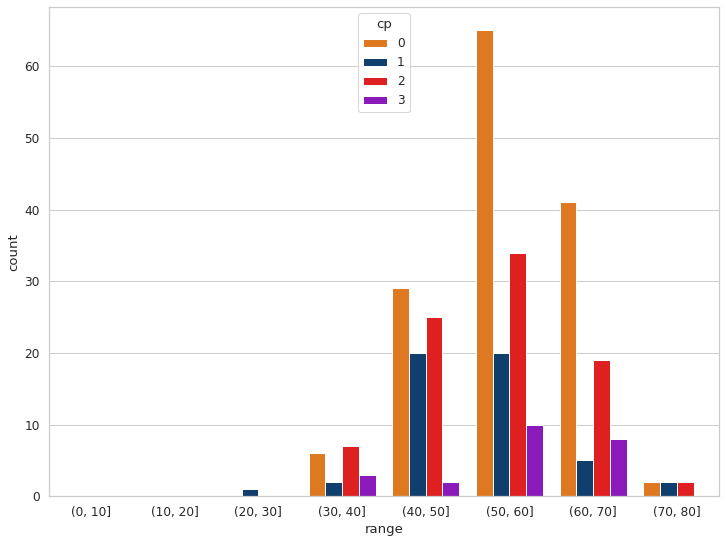

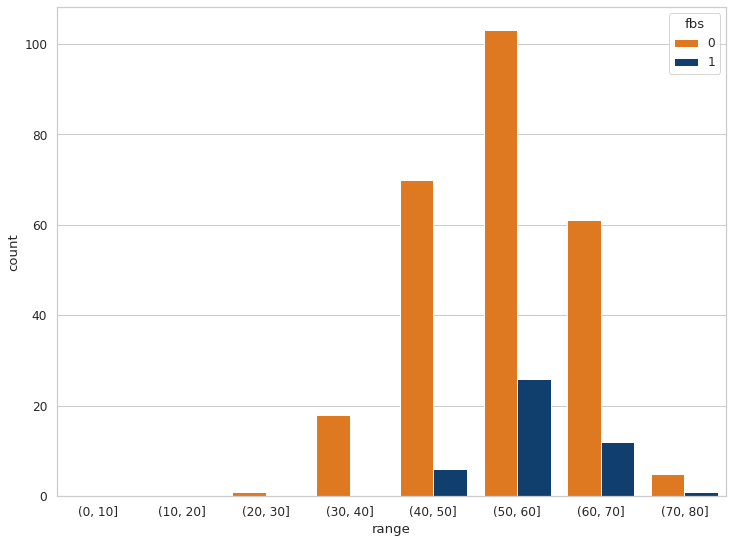

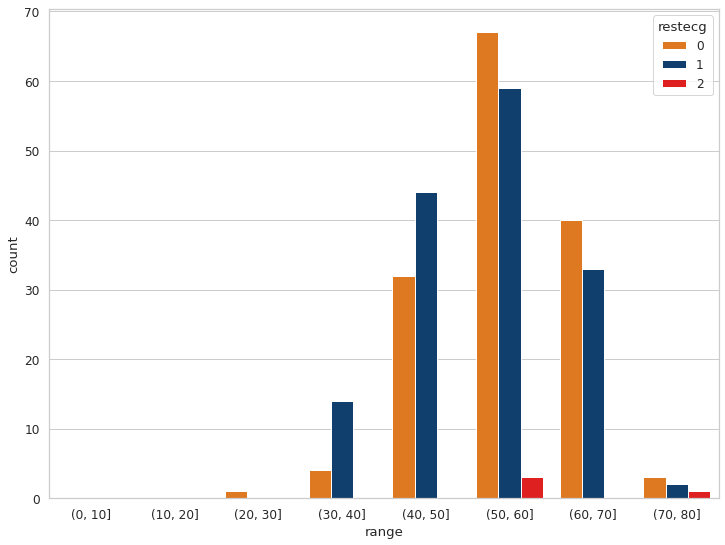

In [195]:
cat_attribute = ['cp','fbs', 'restecg']
num_attribute = ['trtbps', 'chol', 'thalachh']

for i in cat_attribute:
    plt.figure(figsize=(12, 9))
    sns.countplot(x='range', data = df, hue=i, palette=["#FD7702","#003F7D", '#FF0000', '#9400D4'])

As we can see from the above bar chart, people with the age of 50-60 have high chest pain(cp),fasting blood sugar(fbs) and resting electrocardiographic results(restecg).

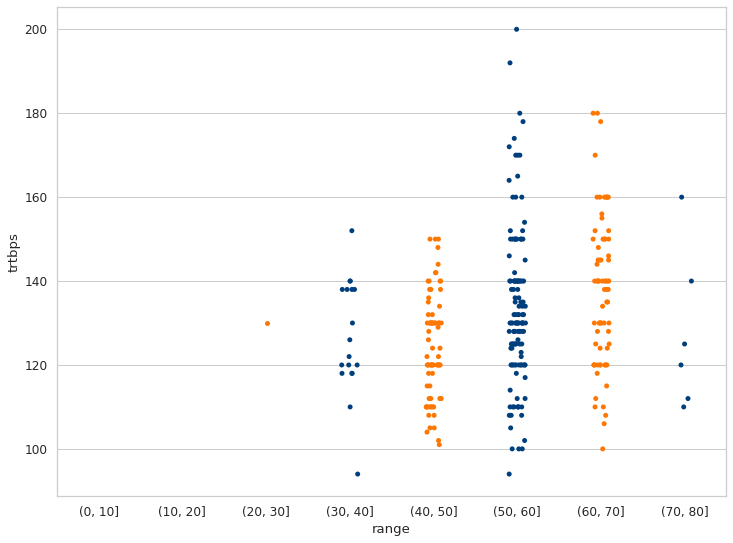

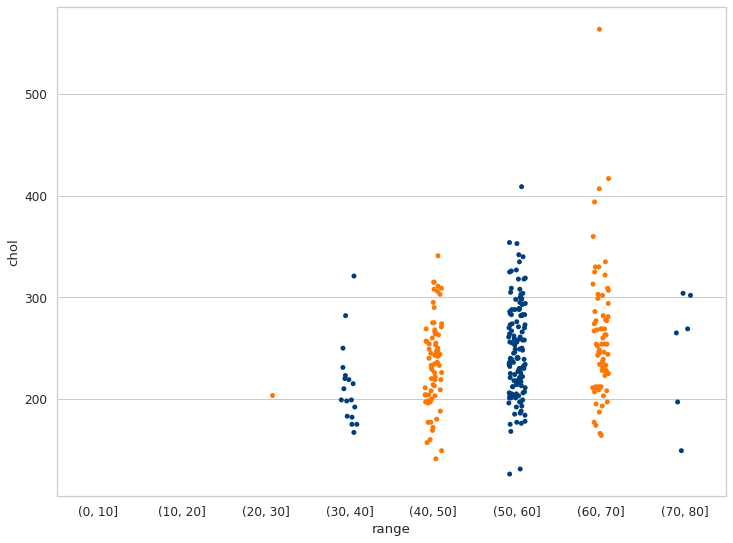

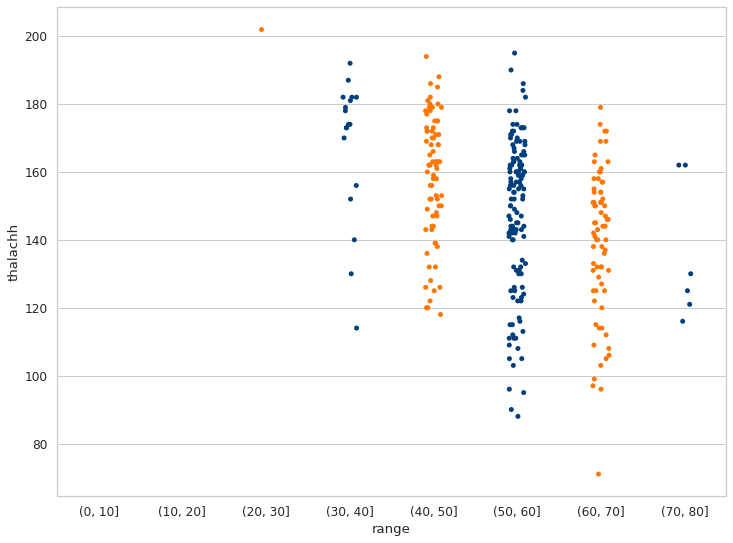

In [196]:
for i in num_attribute:
    plt.figure(figsize=(12, 9))
    sns.stripplot(x='range', y = i, data = df, palette=["#FD7702","#003F7D"])

In [197]:
df.groupby('range')['trtbps', 'chol', 'thalachh'].count()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,trtbps,chol,thalachh
range,,,
"(0, 10]",0,0,0
"(10, 20]",0,0,0
"(20, 30]",1,1,1
"(30, 40]",18,18,18
"(40, 50]",76,76,76
"(50, 60]",129,129,129
"(60, 70]",73,73,73
"(70, 80]",6,6,6


Age group of 50-60 has more instances of people having high resting blood pressure(trtbps), cholestrol(chol) and heart rate(thalachh).                                           

In [198]:
#output vs age
#output vs chestpain
#output vs resting_blood_pressure
#output vs cholestrol_in_mg
#output vs fasting_blood_sugar
#output vs resting_electrocardigraphic
#output vs maximum_heart_rate_acheived
#output vs previous_peak
#output vs number_od_major_vessels

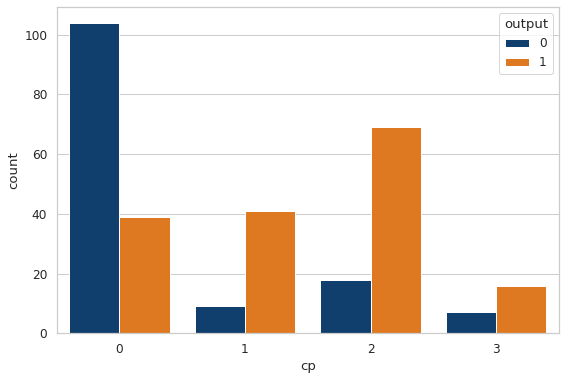

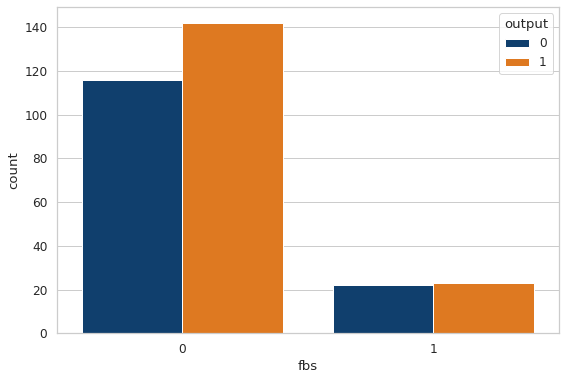

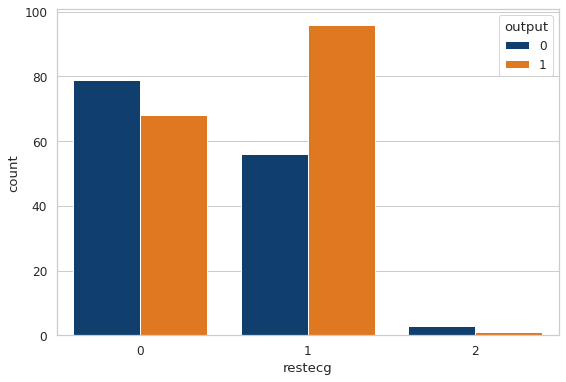

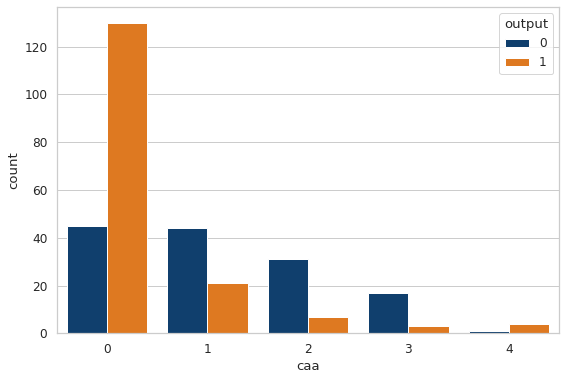

In [199]:
cat_attr = ['cp', 'fbs', 'restecg', 'caa']
num_attr = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

for i in cat_attr:
    plt.figure(figsize=(9, 6))
    sns.countplot(x=i, data = df, hue='output', palette=["#003F7D", "#FD7702"])

* People having chest pain(cp) type 2 : atypical angina have high chances of heart attack.
* People with blood sugar less than 120 mg/dl have chances of heart attack.
* People with resting electrocardiographic results of value 1 : having ST-T wave abnormality have high chances of heart attack.
* People with caa type 0 have high chances of heart attack.

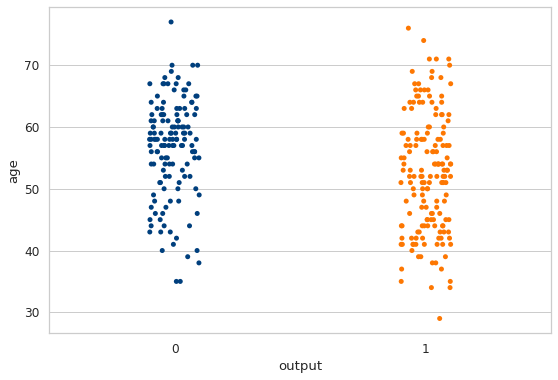

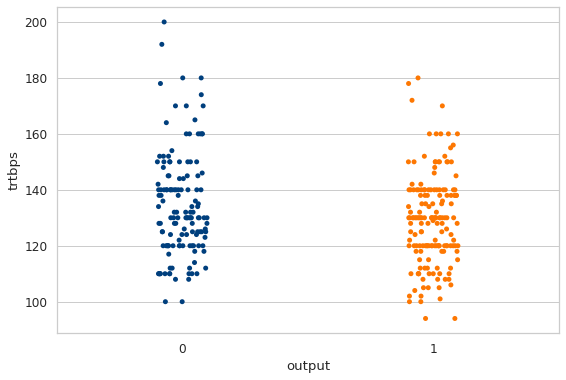

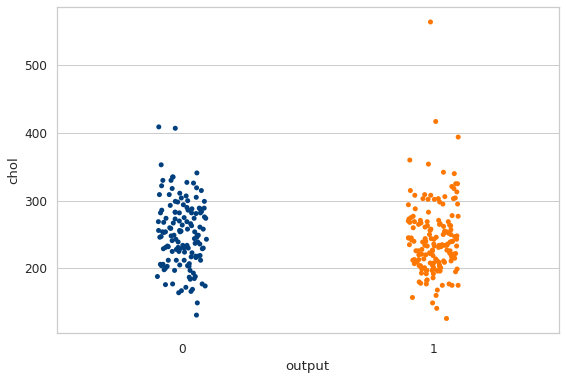

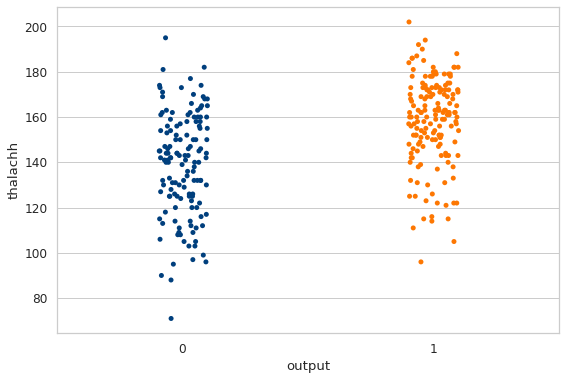

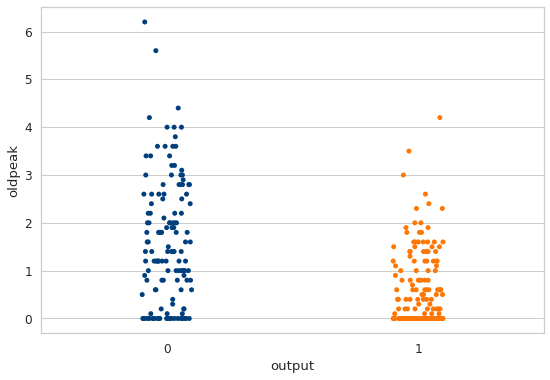

In [200]:
for i in num_attr:
    plt.figure(figsize=(9, 6))
    sns.stripplot(x='output', y = i, data = df, palette=["#003F7D", "#FD7702"])

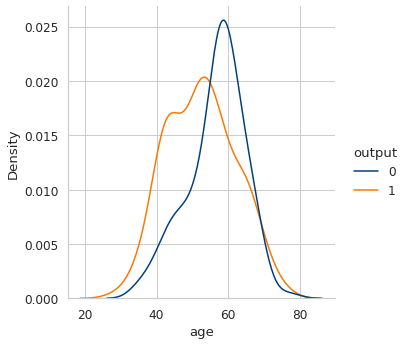

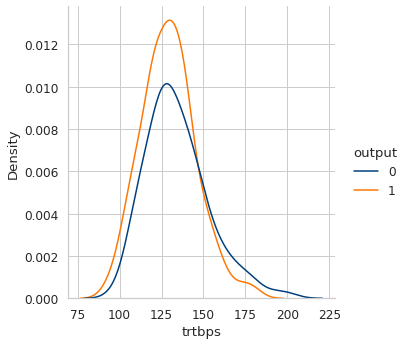

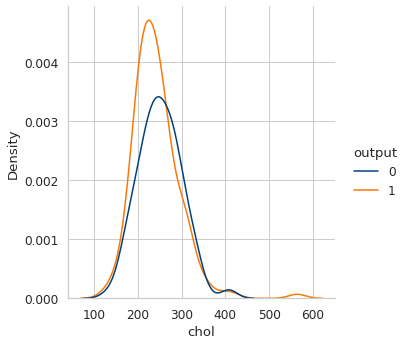

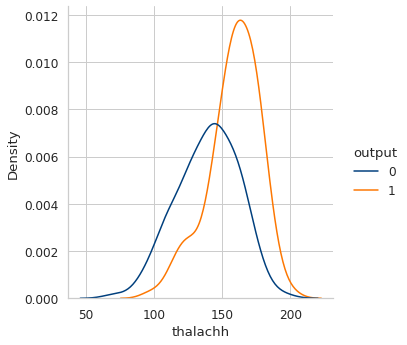

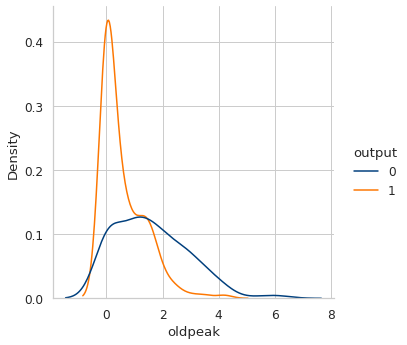

In [201]:
#Distribution of numeric features with the target variable.
parameters = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
for i in parameters:
    sns.displot(x = i, data=df, hue = 'output', kind = 'kde', palette=["#003F7D", "#FD7702"])

In [202]:
#Correlation of features with respect to target variable
corr_matrix = df.corr()
corr_matrix['output'].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

<AxesSubplot:>

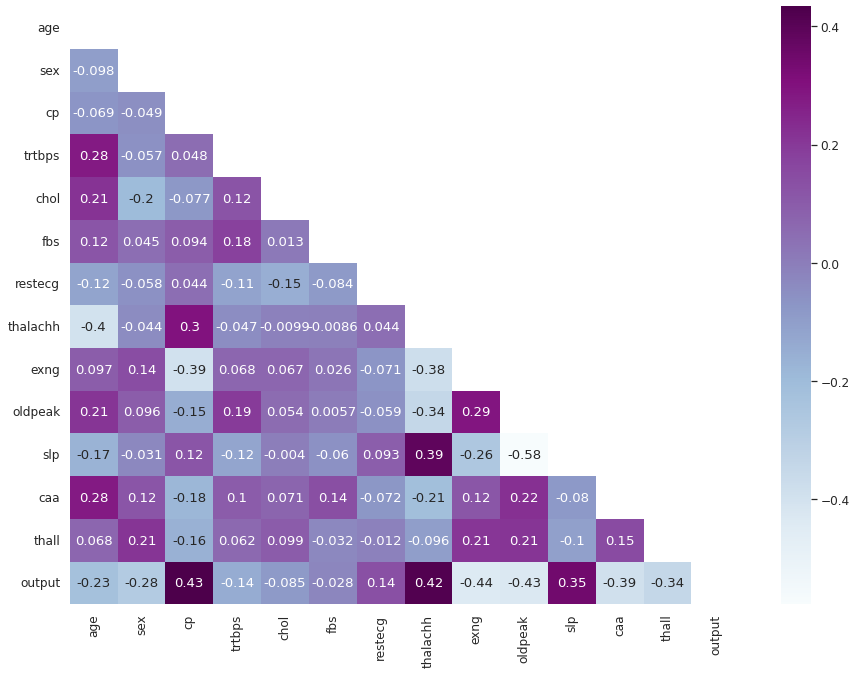

In [203]:
#heatmap
matrix = np.triu(corr_matrix)
plt.figure(figsize=(15, 11))
sns.heatmap(corr_matrix, annot=True, mask=matrix, cmap = 'BuPu')

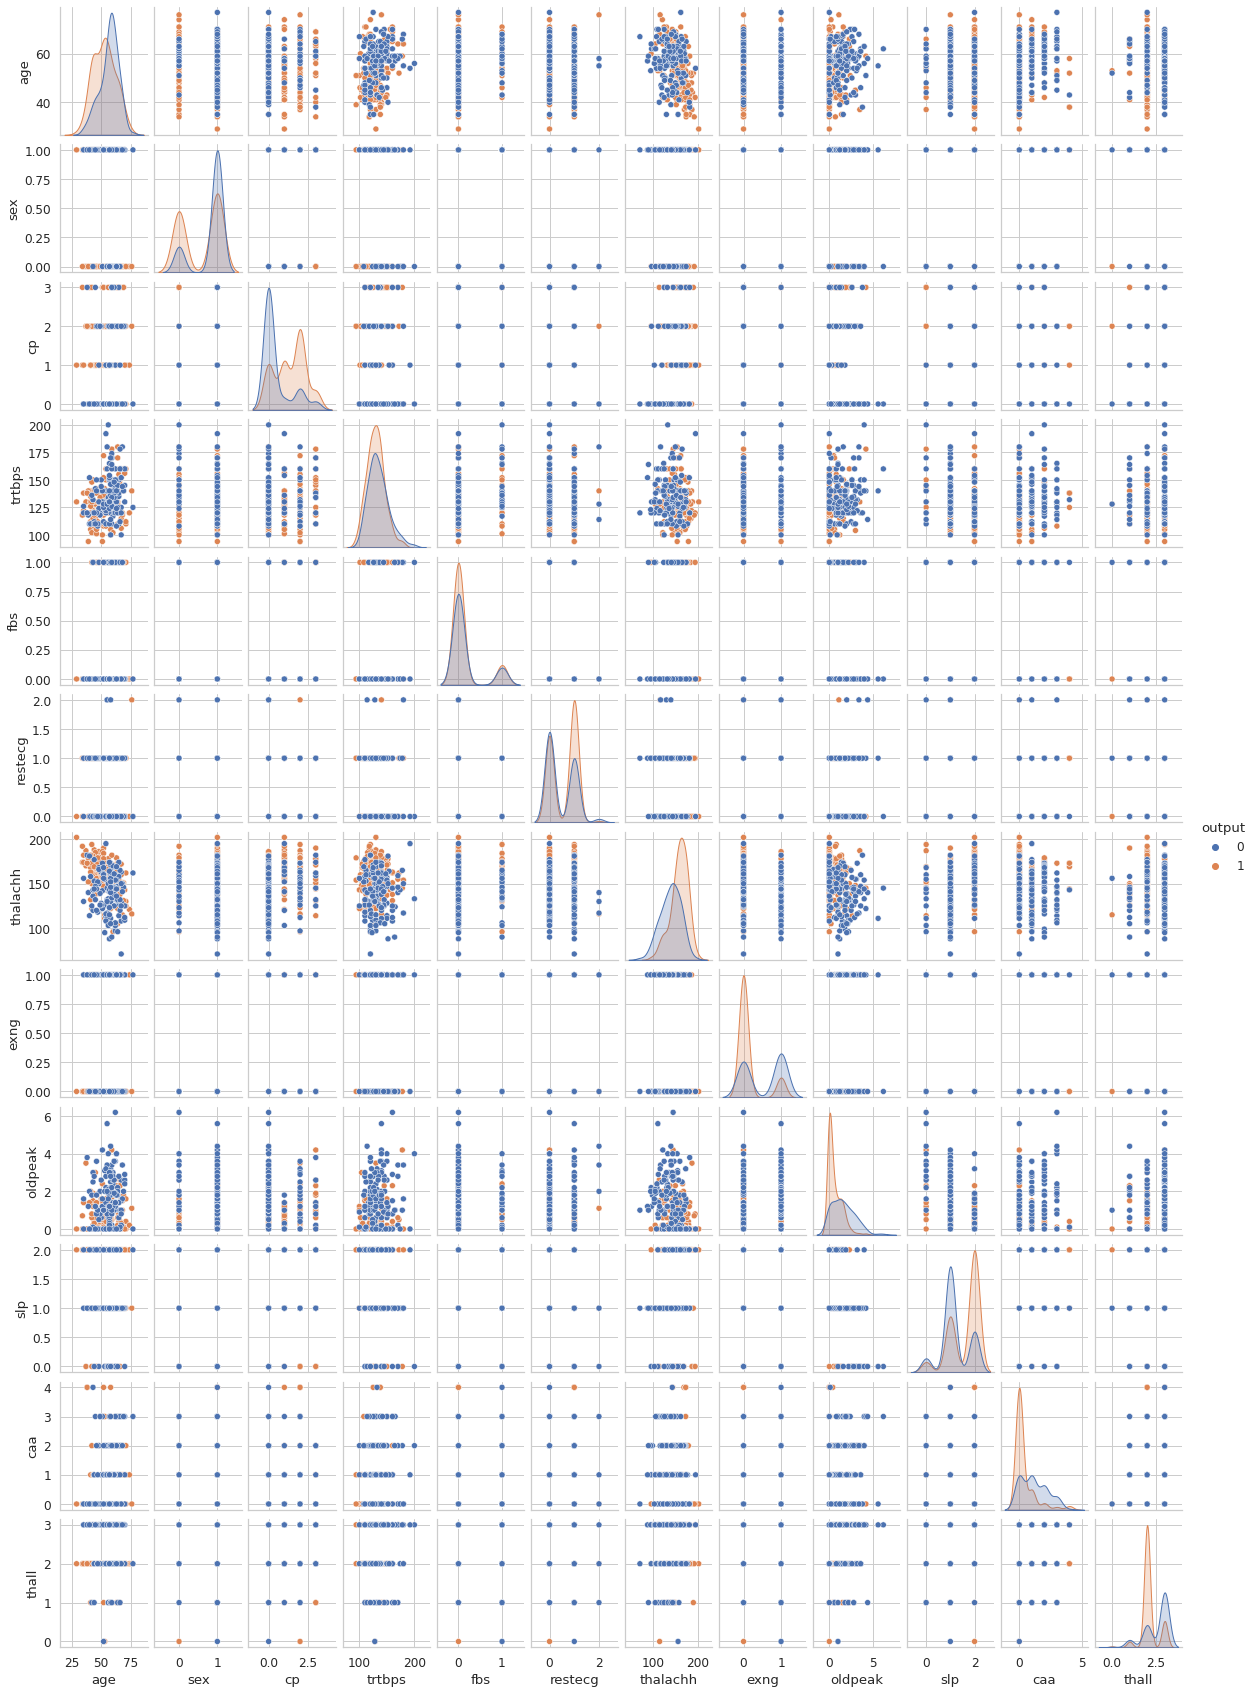

In [204]:
features = ['age', 'sex', 'cp', 'trtbps', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
sns.pairplot(df[features], hue = 'output', height = 2, aspect=0.7)

# Model Building

In [205]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,range,M/F
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 70]",male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(30, 40]",male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 50]",female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(50, 60]",male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(50, 60]",female


In [206]:
#dropping the range and M/F columns added earlier
df = df.drop(['range', 'M/F'], axis = 1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [207]:
#seperating the dependent variable from the independent variable
X = df.drop('output', axis = 1)
y = df['output'].values

In [209]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
#support vector classification
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)


print(accuracy_score(y_test, y_pred_svc))
print('\n')
print(confusion_matrix(y_test, y_pred_svc))
print('\n')
print(classification_report(y_test, y_pred_svc))

0.7049180327868853


[[15 14]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



In [212]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train, y_train)
y_pred_rfc = rfc_clf.predict(X_test)


print(accuracy_score(y_test, y_pred_rfc))
print('\n')
print(confusion_matrix(y_test, y_pred_rfc))
print('\n')
print(classification_report(y_test, y_pred_rfc))

0.8524590163934426


[[24  5]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [213]:
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

DT = DecisionTreeClassifier(max_depth=7 , criterion='entropy')
DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)
accuracy_score(y_test,y_pred_DT)

0.8032786885245902

In [214]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.92      0.69      0.79        32

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



<AxesSubplot:>

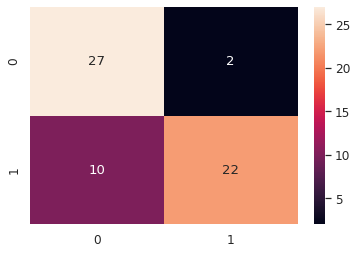

In [215]:
cm = confusion_matrix(y_test,y_pred_DT)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy import stats

n = 6
KNN = KNeighborsClassifier(n)
KNN.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print(KNN.score(X_test, y_test))
y_pred_KNN = KNN.predict(X_test)

0.7213114754098361


In [217]:
print(accuracy_score(y_test, y_pred_KNN))
print('\n')
print(confusion_matrix(y_test, y_pred_KNN))
print('\n')
print(classification_report(y_test, y_pred_KNN))

0.7213114754098361


[[21  8]
 [ 9 23]]


              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.74      0.72      0.73        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [218]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_xgb))
print('\n')
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print(classification_report(y_test, y_pred_xgb))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.819672131147541


[[25  4]
 [ 7 25]]


              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [219]:
results = pd.DataFrame(columns =['accuracy_score', 'F1 score'], index = ['Support Vector Classification', 'Random Forest Classifier','Decision tree' ,'KNN' ,'Xgboost'])

In [220]:
results.loc['Support Vector Classification'] = [accuracy_score(y_test, y_pred_svc), round(f1_score(y_test, y_pred_svc), 2)]
results.loc['Random Forest Classifier'] = [accuracy_score(y_test, y_pred_rfc), round(f1_score(y_test, y_pred_rfc), 2)]
results.loc['Decision tree'] = [accuracy_score(y_test, y_pred_DT), round(f1_score(y_test, y_pred_DT), 2)]
results.loc['KNN'] = [accuracy_score(y_test, y_pred_KNN), round(f1_score(y_test, y_pred_KNN), 2)]
results.loc['Xgboost'] = [accuracy_score(y_test, y_pred_xgb), round(f1_score(y_test, y_pred_xgb), 2)]

In [221]:
results

,accuracy_score,F1 score
Support Vector Classification,0.704918,0.76
Random Forest Classifier,0.852459,0.86
Decision tree,0.803279,0.79
KNN,0.721311,0.73
Xgboost,0.819672,0.82


#### Well it seems Logistic Regression performs the best in classifying and generalizing with the target variable.

##### Thanks for reading!
##### Your feedbacks and comments would be appreciated.
##### All the best analyzing and modeling data 👍